In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
anime_df = pd.read_csv('anime.csv')

ModuleNotFoundError: No module named 'ydata_profiling'

In [2]:
anime_df.shape

(12294, 7)

In [3]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [4]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [18]:
anime_df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [5]:
anime_df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [20]:
anime_df[anime_df.duplicated()]

,anime_id,name,genre,type,episodes,rating,members


In [21]:
anime_clean_df = anime_df.dropna()

In [22]:
anime_clean_df.count()

anime_id    12017
name        12017
genre       12017
type        12017
episodes    12017
rating      12017
members     12017
dtype: int64

In [23]:
anime_type = anime_clean_df['type'].unique()

In [24]:
anime_type

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

In [25]:
ax = anime_clean_df['type'].value_counts()

<AxesSubplot:>

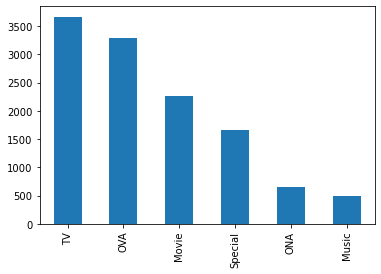

In [26]:
ax.plot(kind='bar')

In [10]:
genre_categories = anime_df['genre'].unique()

In [11]:
genre_categories

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Hentai, Sports', 'Drama, Romance, School, Yuri',
       'Hentai, Slice of Life'], dtype=object)

In [14]:
second_clean_df_split = anime_clean_df['genre'].str.split(', ', expand=True)

In [15]:
second_clean_df_split

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Drama,Romance,School,Supernatural,None,None,None,None,None,None,None,None,None
1,Action,Adventure,Drama,Fantasy,Magic,Military,Shounen,None,None,None,None,None,None
2,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None
3,Sci-Fi,Thriller,None,None,None,None,None,None,None,None,None,None,None
4,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,Hentai,None,None,None,None,None,None,None,None,None,None,None,None
12290,Hentai,None,None,None,None,None,None,None,None,None,None,None,None
12291,Hentai,None,None,None,None,None,None,None,None,None,None,None,None
12292,Hentai,None,None,None,None,None,None,None,None,None,None,None,None


In [17]:
second_clean_df_split.apply(pd.value_counts)
#Lists out the genres 

,0,1,2,3,4,5,6,7,8,9,10,11,12
Action,2768.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adventure,1445.0,871.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cars,35.0,33.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Comedy,3147.0,1105.0,321.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dementia,205.0,28.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Demons,84.0,138.0,57.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Drama,974.0,720.0,221.0,61.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ecchi,64.0,381.0,148.0,32.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fantasy,484.0,830.0,636.0,252.0,39.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Game,37.0,58.0,42.0,34.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#df_w_genres = pd.concat([anime_clean_df, second_clean_df_split],axis=1)

In [16]:
#df_w_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12017 entries, 0 to 12293
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
 7   0         12017 non-null  object 
 8   1         9250 non-null   object 
 9   2         6618 non-null   object 
 10  3         4063 non-null   object 
 11  4         2167 non-null   object 
 12  5         931 non-null    object 
 13  6         351 non-null    object 
 14  7         126 non-null    object 
 15  8         53 non-null     object 
 16  9         14 non-null     object 
 17  10        3 non-null      object 
 18  11        1 non-null      object 
 19  12        1 non-null      object 
dtypes: float64(1), int64(2), obj

In [ ]:
#Finding new shows to experience

In [20]:
df_w_genres[df_w_genres['genre'].str.contains("Hentai|Yaoi|Yuri")==False]

,anime_id,name,genre,type,episodes,rating,members,0,1,2,3,4,5,6,7,8,9,10,11,12
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,Drama,Romance,School,Supernatural,None,None,None,None,None,None,None,None,None
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Action,Adventure,Drama,Fantasy,Magic,Military,Shounen,None,None,None,None,None,None
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,Sci-Fi,Thriller,None,None,None,None,None,None,None,None,None,None,None
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10891,11095,Zouressha ga Yatte Kita,Adventure,Movie,1,6.06,78,Adventure,None,None,None,None,None,None,None,None,None,None,None,None
10892,7808,Zukkoke Knight: Don De La Mancha,"Adventure, Comedy, Historical, Romance",TV,23,6.47,172,Adventure,Comedy,Historical,Romance,None,None,None,None,None,None,None,None,None
10893,28543,Zukkoke Sannin-gumi no Hi Asobi Boushi Daisakusen,"Drama, Kids",OVA,1,5.83,50,Drama,Kids,None,None,None,None,None,None,None,None,None,None,None
10894,18967,Zukkoke Sannin-gumi: Zukkoke Jikuu Bouken,"Comedy, Historical, Sci-Fi",OVA,1,6.13,76,Comedy,Historical,Sci-Fi,None,None,None,None,None,None,None,None,None,None


In [ ]:
#second_clean_anime_df = pd.concat([anime_clean_df['genre'], anime_clean_df[1].str.split(',',expand=True)],axis=1)